In [14]:
import pandas
import numpy as np
import matplotlib. pyplot as plt
pandas.set_option("display.precision", 2)

input_table = '../../Data/Processed/airbnb/airbnb.parquet'

# Load Data 

In [15]:
data = pandas.read_parquet(input_table)
print('data shape:', data.shape)
print('data columns:', data.columns.tolist())
data.head()

data shape: (5666, 16)
data columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,40.75,-73.95,Private room,130.0,3.0,248.0,2019-07-01,2.25,1.0,215.0
1,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75,-73.90,Private room,70.0,30.0,25.0,2019-05-31,0.22,1.0,324.0
2,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74,-73.83,Private room,140.0,2.0,1.0,2011-09-19,0.01,1.0,1.0
3,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,40.75,-73.92,Private room,79.0,30.0,28.0,2019-04-12,0.26,1.0,126.0
4,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70,-73.90,Entire home/apt,350.0,8.0,10.0,2019-05-12,0.11,5.0,365.0


# Data Description 

In [16]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.67e+03,5.67e+03,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00
mean,2.18e+07,9.62e+07,40.73,-73.87,99.52,5.18,27.70,1.57,4.06,144.45
std,1.04e+07,8.42e+07,0.04,0.06,167.10,15.03,51.96,2.13,12.45,135.54
min,1.29e+04,3.21e+03,40.57,-73.96,10.00,1.00,0.00,0.00,1.00,0.00
25%,1.40e+07,2.12e+07,40.71,-73.92,50.00,1.00,1.00,0.08,1.00,2.00
50%,2.26e+07,6.83e+07,40.74,-73.90,75.00,2.00,7.00,0.76,1.00,98.00
75%,3.08e+07,1.58e+08,40.76,-73.83,110.00,3.00,32.00,2.31,3.00,286.00
max,3.65e+07,2.74e+08,40.80,-73.71,10000.00,500.00,629.00,20.94,103.00,365.00


# Variable Distribution

In [160]:
num_variables = ['latitude', 'longitude', 'price','minimum_nights','number_of_reviews','reviews_per_month',
                 'calculated_host_listings_count','availability_365']

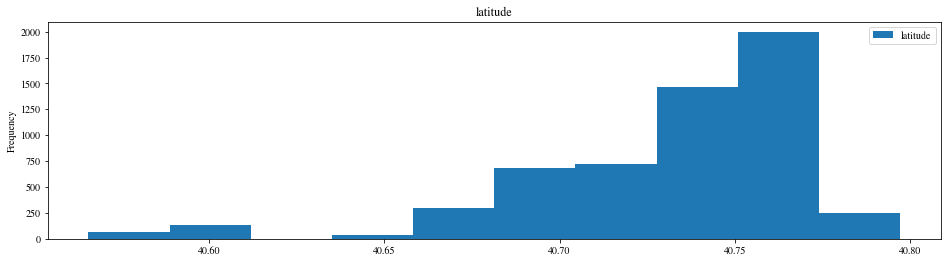

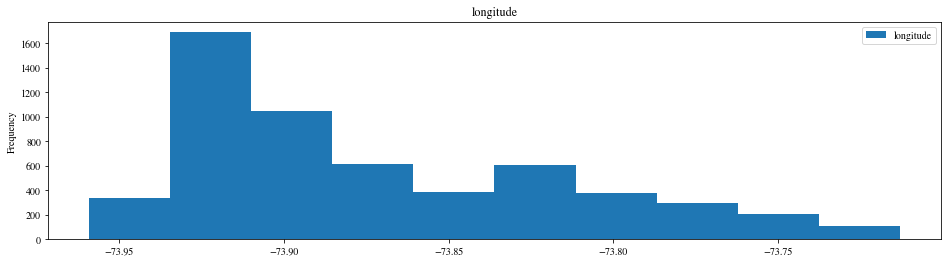

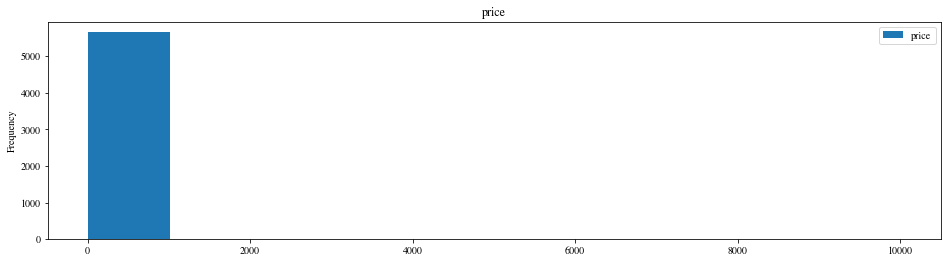

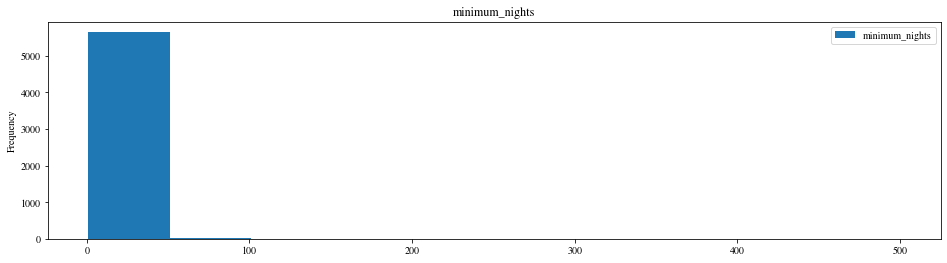

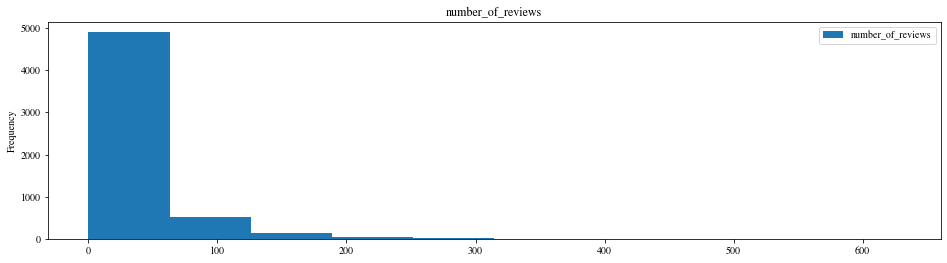

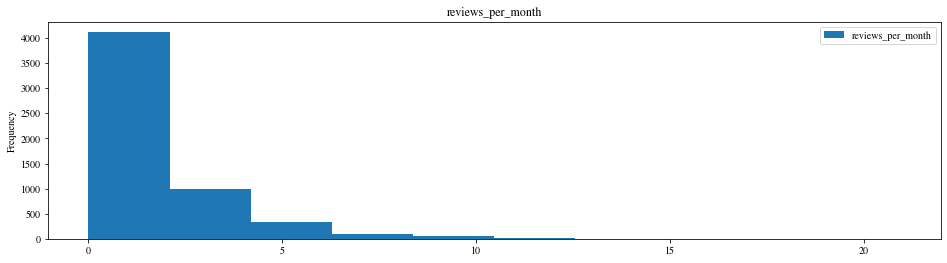

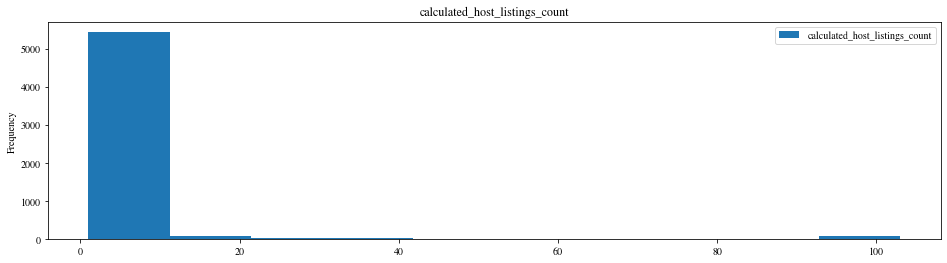

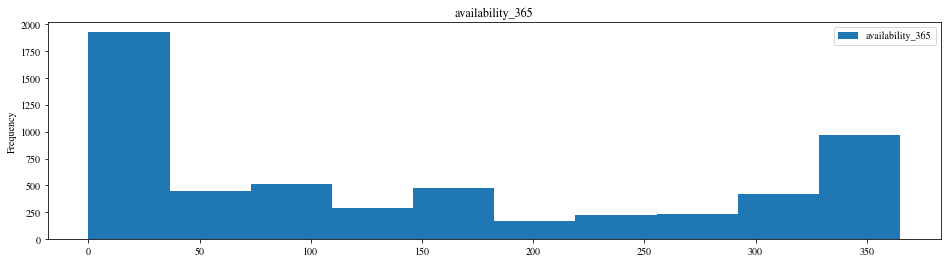

In [159]:
for cname in num_variables:
    plt.figure()
    data[cname].plot.hist(figsize=(16,4), legend=True);
    plt.legend(ncol = 3)
    plt.title(cname)

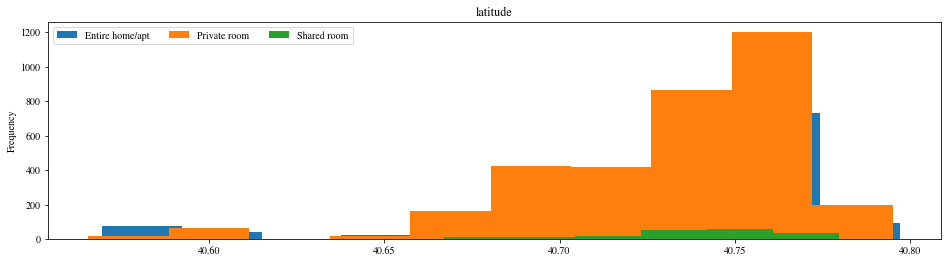

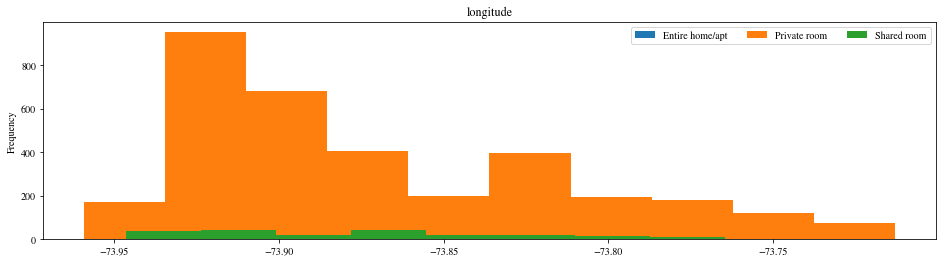

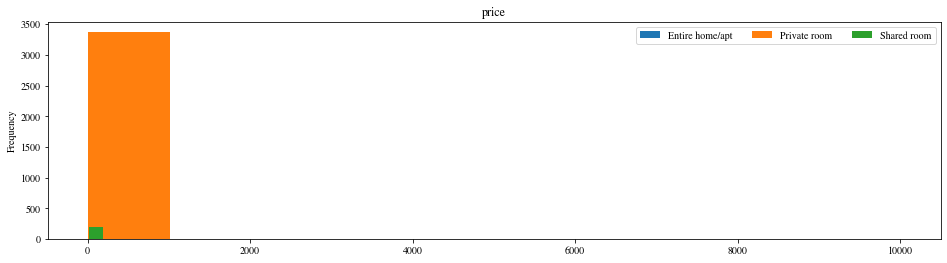

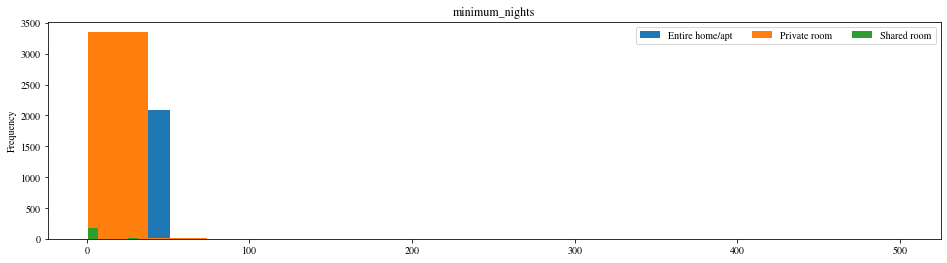

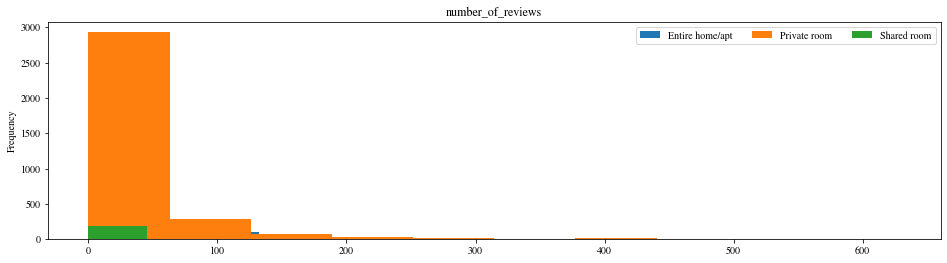

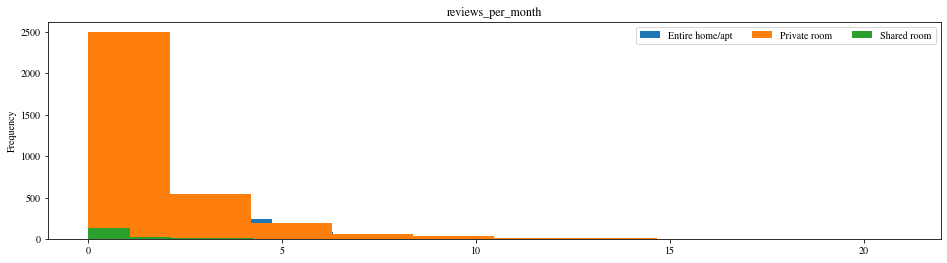

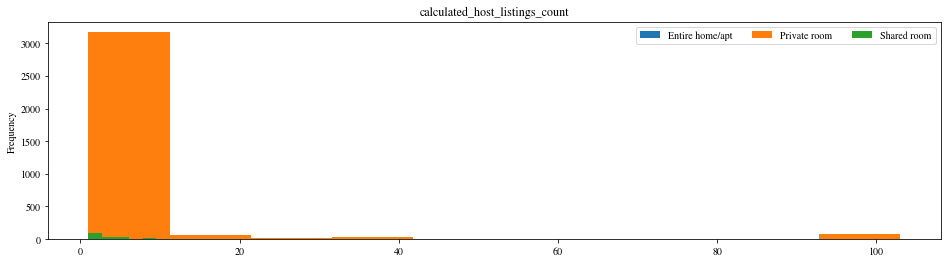

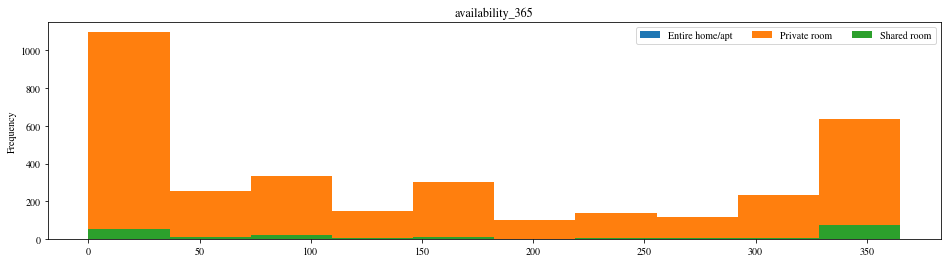

In [166]:
for cname in num_variables:
    plt.figure()
    data.groupby('room_type')[cname].plot.hist(figsize=(16,4), legend=True);
    plt.legend(ncol = 3)
    plt.title(cname)

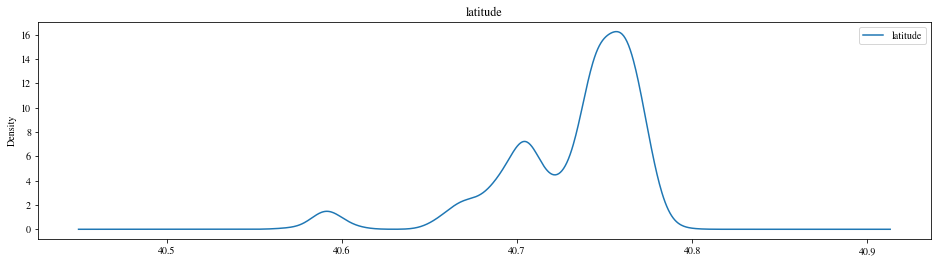

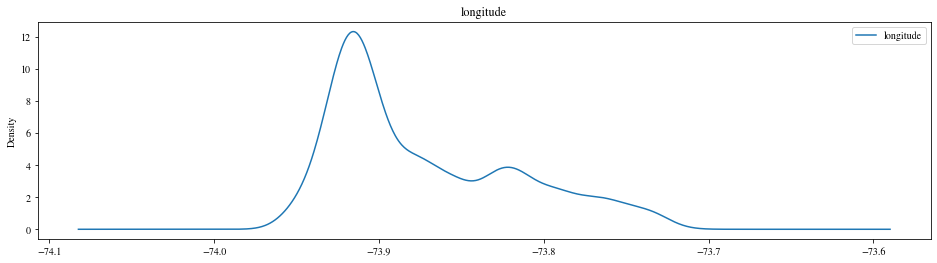

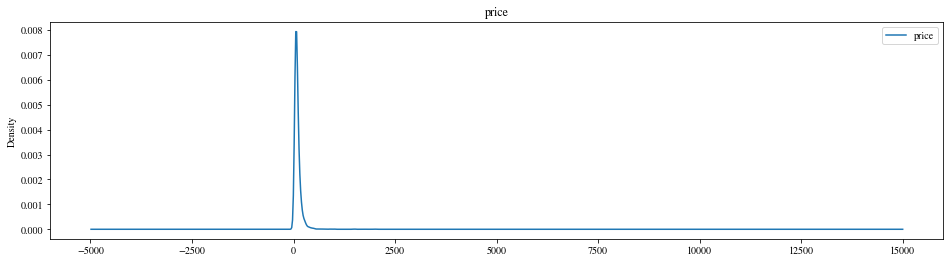

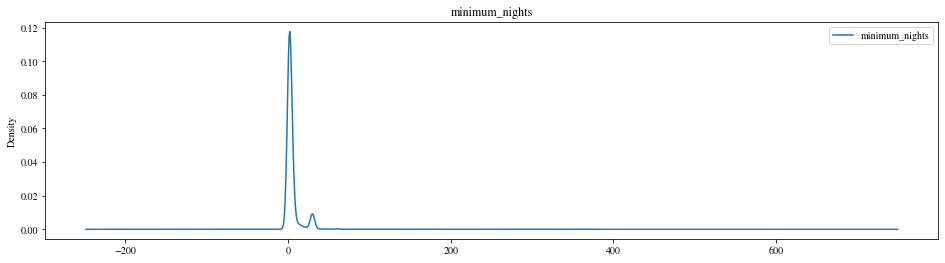

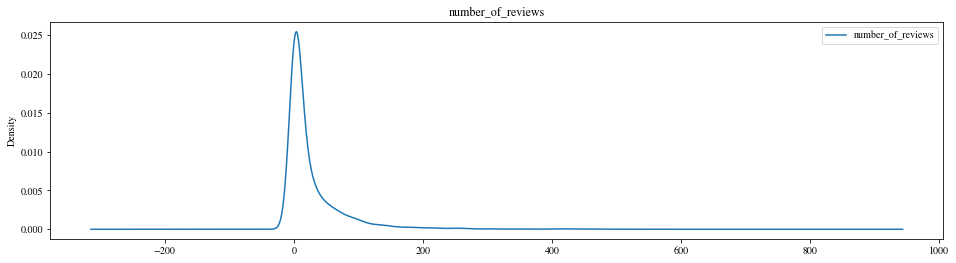

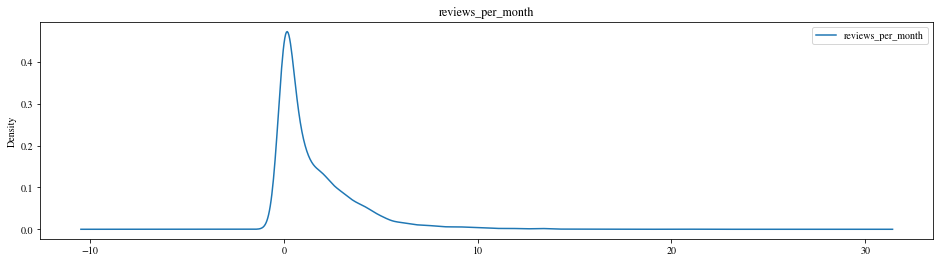

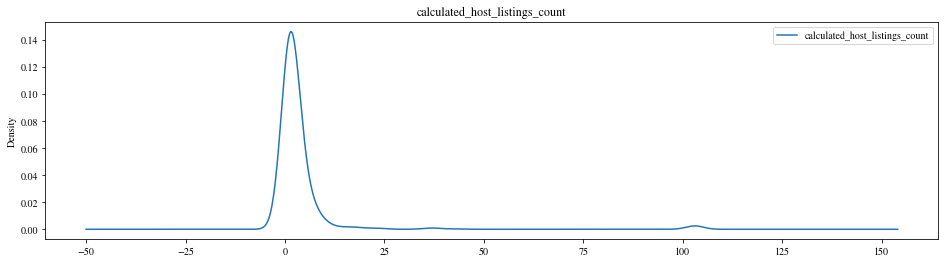

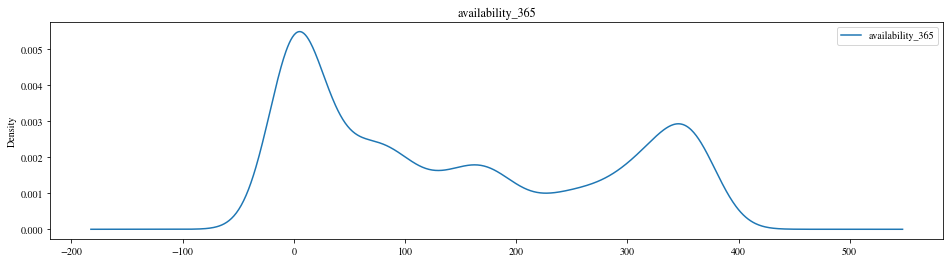

In [165]:
for cname in num_variables:
    plt.figure()
    data[cname].plot.kde(figsize=(16,4), legend=True)
    plt.title(cname)

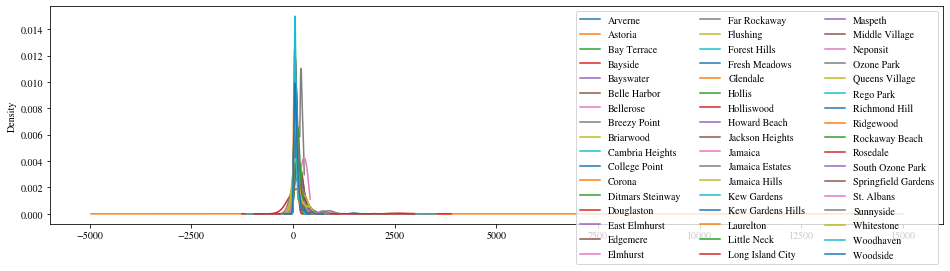

In [162]:
idx = data.price.abs() <= 1000
#df_airbnb[idx].price.plot.kde(figsize=(4,4), legend=True)

data.groupby('neighbourhood').price.plot.kde(figsize=(16,4), legend=True);
plt.legend(ncol = 3)

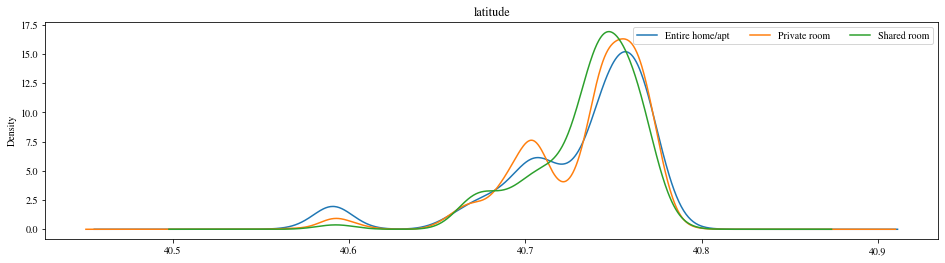

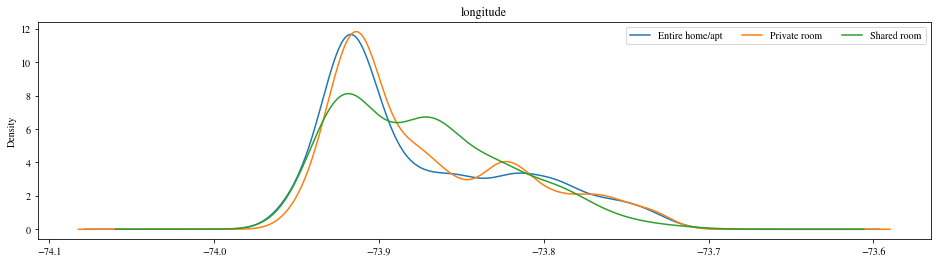

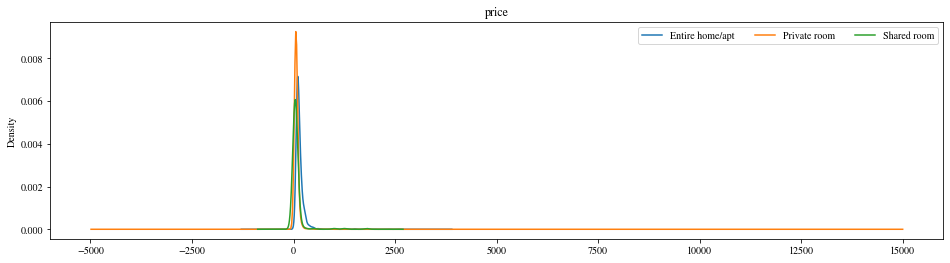

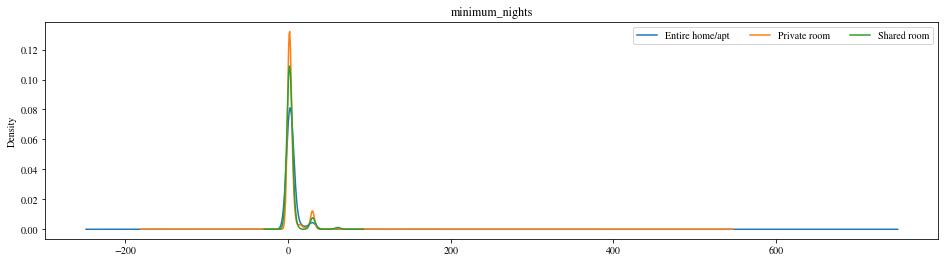

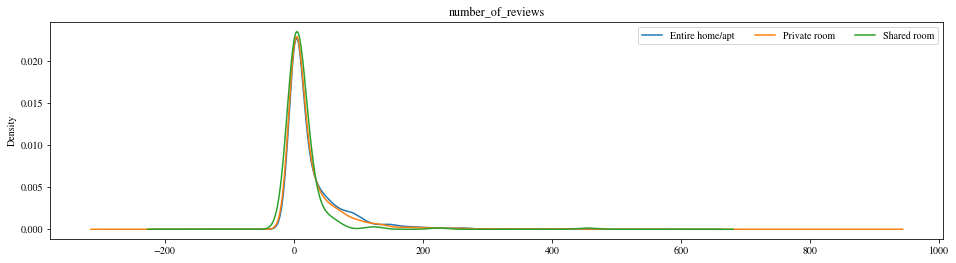

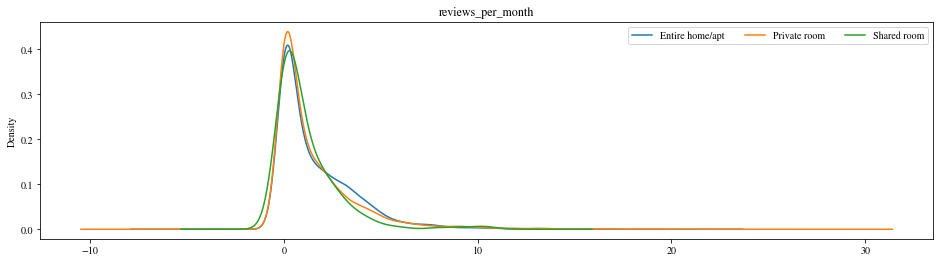

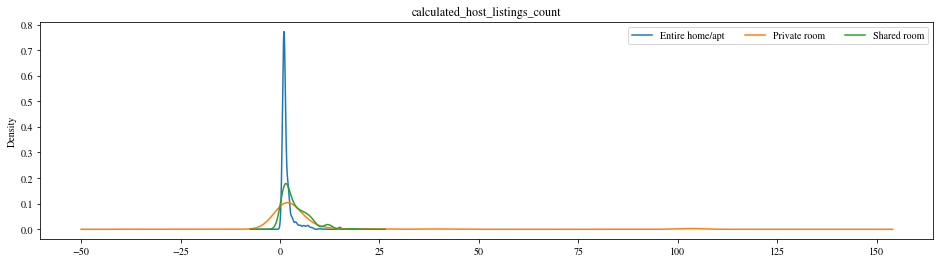

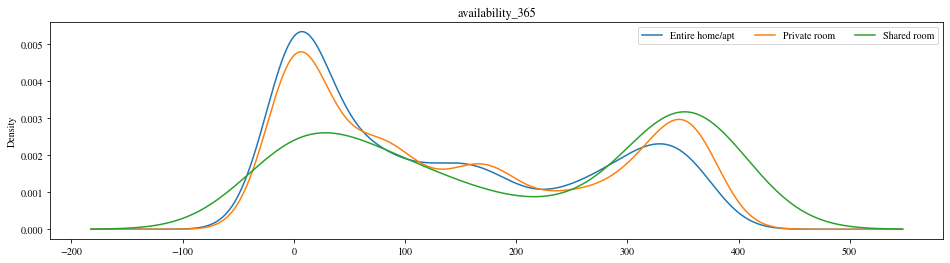

In [163]:
for cname in num_variables:
    plt.figure()
    data.groupby('room_type')[cname].plot.kde(figsize=(16,4), legend=True);
    plt.legend(ncol = 3)
    plt.title(cname)

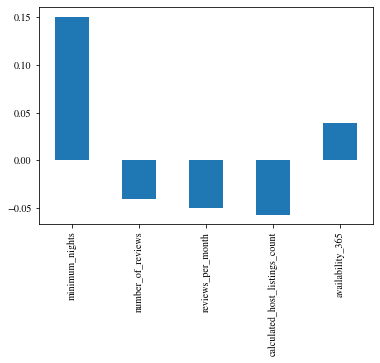

In [152]:
data.corr()['price'].drop(['price','id','host_id','latitude','longitude']).plot.bar()

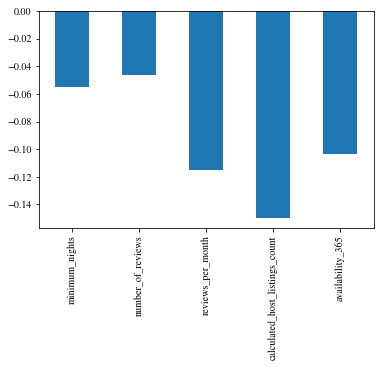

In [164]:
idx = data.room_type == 'Shared room'

data[idx].corr()['price'].drop(['price','id','host_id','latitude','longitude']).plot.bar()